<a href="https://colab.research.google.com/github/nataliapazin/ANN_Trabalho1/blob/main/Codigo_2_Trab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# bibliotecas usadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.metrics import r2_score 

In [2]:
# para gerar o grafico no browser
%matplotlib inline

In [3]:
!git clone https://github.com/nataliapazin/ANN_Trabalho1
%cd ANN_Trabalho1

Cloning into 'ANN_Trabalho1'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 42 (delta 15), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (42/42), done.
/content/ANN_Trabalho1


In [4]:
# leitura dos dados
df=pd.read_csv("Extraction_Data.csv",delimiter=";")
print(df)

    S.N  X1   X2   X3  X4  Dry Weight
0     1  10  3.0  1.5  25     0.50560
1     2  20  3.0  1.5  25     0.62205
2     3  10  6.0  1.5  25     0.68300
3     4  20  6.0  1.5  25     0.35209
4     5  15  4.5  1.0  15     0.62450
5     6  15  4.5  2.0  15     0.61000
6     7  15  4.5  1.0  35     1.65230
7     8  15  4.5  2.0  35     0.85650
8     9  10  4.5  1.5  15     0.25890
9    10  20  4.5  1.5  15     0.18430
10   11  10  4.5  1.5  35     0.97200
11   12  20  4.5  1.5  35     0.87600
12   13  15  3.0  1.0  25     1.01980
13   14  15  6.0  1.0  25     1.20910
14   15  15  3.0  2.0  25     1.21900
15   16  15  4.5  2.0  25     0.48630
16   17  10  4.5  1.0  25     1.00700
17   18  20  4.5  1.0  25     0.70100
18   19  10  4.5  2.0  25     0.32600
19   20  20  3.0  2.0  25     0.38870
20   21  15  6.0  1.5  15     0.54700
21   22  15  3.0  1.5  15     0.44200
22   23  15  6.0  1.5  35     1.20430
23   24  15  4.5  1.5  35     1.20534
24   25  15  4.5  1.5  25     1.63150
25   26  15 

In [5]:
Dat_Select=df.iloc[:,2:]

In [6]:
# separa as colunas de interesse
Index=range(0)
Index=[0,1,2,3,4,5]
X=df.iloc[:,Index].copy()
print(X)

    S.N  X1   X2   X3  X4  Dry Weight
0     1  10  3.0  1.5  25     0.50560
1     2  20  3.0  1.5  25     0.62205
2     3  10  6.0  1.5  25     0.68300
3     4  20  6.0  1.5  25     0.35209
4     5  15  4.5  1.0  15     0.62450
5     6  15  4.5  2.0  15     0.61000
6     7  15  4.5  1.0  35     1.65230
7     8  15  4.5  2.0  35     0.85650
8     9  10  4.5  1.5  15     0.25890
9    10  20  4.5  1.5  15     0.18430
10   11  10  4.5  1.5  35     0.97200
11   12  20  4.5  1.5  35     0.87600
12   13  15  3.0  1.0  25     1.01980
13   14  15  6.0  1.0  25     1.20910
14   15  15  3.0  2.0  25     1.21900
15   16  15  4.5  2.0  25     0.48630
16   17  10  4.5  1.0  25     1.00700
17   18  20  4.5  1.0  25     0.70100
18   19  10  4.5  2.0  25     0.32600
19   20  20  3.0  2.0  25     0.38870
20   21  15  6.0  1.5  15     0.54700
21   22  15  3.0  1.5  15     0.44200
22   23  15  6.0  1.5  35     1.20430
23   24  15  4.5  1.5  35     1.20534
24   25  15  4.5  1.5  25     1.63150
25   26  15 

In [7]:
Index=['Dry Weight']
y=df[Index]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, shuffle=True, random_state=25)# 1

In [9]:
scaler_X = preprocessing.MinMaxScaler((-1,1)).fit(X)
scaler_Y = preprocessing.MinMaxScaler((-1,1)).fit(y)

In [10]:
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_Y.transform(y_train)
y_test = scaler_Y.transform(y_test)

In [11]:
# define a rede neural 
model = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(12,), random_state=10 )

In [12]:
# treina a rede neural
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(12,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=10, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [13]:
# usa a rede neural treinada em calculos para treino e teste
y_calc_train=model.predict(X_train)
y_calc_test=model.predict(X_test)

In [14]:
# transforma dos dados calculados na forma original (nao normatizado)
y_obs_train=scaler_Y.inverse_transform(np.array(y_train).reshape(-1,1))
y_obs_test=scaler_Y.inverse_transform(np.array(y_test).reshape(-1,1))
y_calc_train=scaler_Y.inverse_transform(y_calc_train.reshape(-1,1))
y_calc_test=scaler_Y.inverse_transform(y_calc_test.reshape(-1,1))

In [15]:
print(pd.DataFrame({'test calc':y_calc_test.ravel(),'test true':y_obs_test.ravel()}))

   test calc  test true
0   0.702389      0.683
1   0.958277      0.972
2   0.396010      0.442
3   0.871358      0.876
4   1.202727      1.219


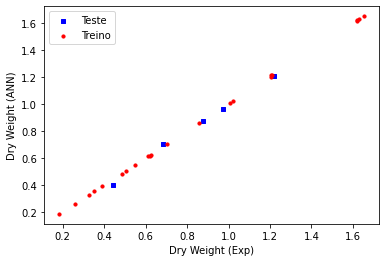

In [16]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(y_obs_test,y_calc_test, s=10, c='b', marker="s", label='Teste')
ax1.scatter(y_obs_train,y_calc_train, s=10, c='r', marker="o", label='Treino')
plt.legend(loc='upper left')
plt.ylabel('Dry Weight (ANN)')
plt.xlabel('Dry Weight (Exp)')
plt.show()

In [17]:
print('============= TREINO =============')
mse=mean_squared_error(y_obs_train,y_calc_train)
print("MSE treino=",mse)
R2=r2_score(y_obs_train,y_calc_train)
print("R^2 treino=",R2)
print('==================================\n\n')
print('============== TESTE ==============')
mse=mean_squared_error(y_obs_test,y_calc_test)
print("MSE teste=",mse)
R2=r2_score(y_obs_test,y_calc_test)
print("R^2 teste=",R2)
print('===================================')

============= TREINO =============
MSE treino= 8.85622707735123e-06
R^2 treino= 0.999960471252986


============== TESTE ==============
MSE teste= 0.0005931426669853178
R^2 teste= 0.9914137144430112
